# Laboratorio 05: Modelos de ML para predecir la producción

Objetivo:

    Aplicar modelos de regresión para predecir tasas de producción de petróleo/gas.
    Analizar factores influyentes en el rendimiento de los pozos.
    Comparar el rendimiento de diferentes técnicas de regresión.
    Evaluar y comunicar los resultados obtenidos.


In [10]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga del dataset
df = pd.read_csv('datos_petroleros_completos.csv')
df.head()

,fecha,pozo,campo,petroleo_bbl,gas_mscf,agua_bbl,presion_cabezal_psi,presion_linea_psi,temperatura_c,choke_percent,horas_operativas,liquido_total,corte_agua,gas_petroleo_ratio,produccion_equivalente,gas_agua_ratio,indice_productividad,eficiencia_termica,indice_trabajo,prod_por_choke
0,2022-01-01,POZO-A,CAMPO-A,1259.605698,1491.465814,203.916905,1791.928342,793.077201,82.209703,42.009378,23.534629,1463.522603,0.139333,1.184074,1508.183334,7.314086,0.702933,18.345564,0.016081,29.983917
1,2022-01-02,POZO-A,CAMPO-A,1181.730032,1429.280662,180.654841,1807.663519,738.785088,74.599645,52.310863,20.364252,1362.384872,0.132602,1.209482,1419.943476,7.911665,0.653733,19.034186,0.014948,22.590528
2,2022-01-03,POZO-A,CAMPO-A,1274.368468,1529.871781,208.609894,1599.779932,789.548837,87.157927,60.121548,23.003376,1482.978362,0.140670,1.200494,1529.347098,7.333649,0.796590,17.546850,0.015512,21.196534
3,2022-01-04,POZO-A,CAMPO-A,1377.735865,1658.166842,166.615958,1891.032767,757.473977,79.661918,43.184130,23.327821,1544.351822,0.107887,1.203545,1654.097005,9.952029,0.728563,20.763961,0.015105,31.903754
4,2022-01-05,POZO-A,CAMPO-A,1165.202656,1359.592698,221.473781,1833.848848,770.973828,80.300655,50.948531,23.924270,1386.676437,0.159716,1.166829,1391.801439,6.138843,0.635386,17.332380,0.017253,22.870191


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   1825 non-null   object 
 1   pozo                    1825 non-null   object 
 2   campo                   1825 non-null   object 
 3   petroleo_bbl            1825 non-null   float64
 4   gas_mscf                1825 non-null   float64
 5   agua_bbl                1825 non-null   float64
 6   presion_cabezal_psi     1825 non-null   float64
 7   presion_linea_psi       1825 non-null   float64
 8   temperatura_c           1825 non-null   float64
 9   choke_percent           1825 non-null   float64
 10  horas_operativas        1825 non-null   float64
 11  liquido_total           1825 non-null   float64
 12  corte_agua              1825 non-null   float64
 13  gas_petroleo_ratio      1825 non-null   float64
 14  produccion_equivalente  1825 non-null   

In [7]:
df.columns

Index(['fecha', 'pozo', 'campo', 'petroleo_bbl', 'gas_mscf', 'agua_bbl',
       'presion_cabezal_psi', 'presion_linea_psi', 'temperatura_c',
       'choke_percent', 'horas_operativas', 'liquido_total', 'corte_agua',
       'gas_petroleo_ratio', 'produccion_equivalente', 'gas_agua_ratio',
       'indice_productividad', 'eficiencia_termica', 'indice_trabajo',
       'prod_por_choke'],
      dtype='object')

In [5]:
# Definición de variables
# Independientes
features = ['petroleo_bbl', 'gas_mscf', 'agua_bbl',
       'presion_cabezal_psi', 'presion_linea_psi', 'temperatura_c',
       'choke_percent']
# Dependiente
target = 'produccion_equivalente'

In [27]:
# subset para evaluar y hacer el modelo
subset = df[features + [target]]

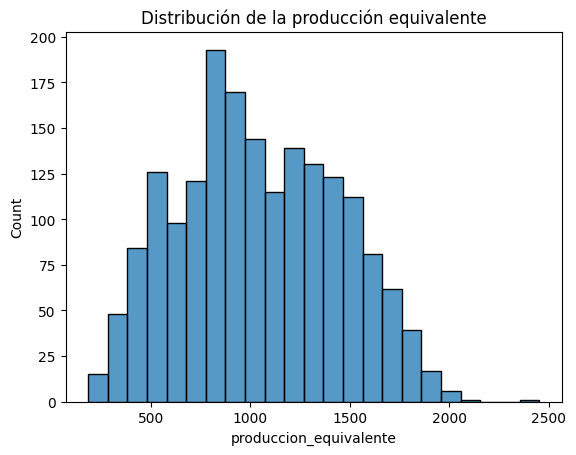

In [11]:
sns.histplot( df[target] )
plt.title('Distribución de la producción equivalente')
plt.show()

In [19]:
prueba = "test"
print(f' Gráfico XY de produccion_equivalente vs {prueba} ')

 Gráfico XY de produccion_equivalente vs test 


In [24]:
for i in features:
    print(i)
    print('fin de ciclo')

petroleo_bbl
fin de ciclo
gas_mscf
fin de ciclo
agua_bbl
fin de ciclo
presion_cabezal_psi
fin de ciclo
presion_linea_psi
fin de ciclo
temperatura_c
fin de ciclo
choke_percent
fin de ciclo


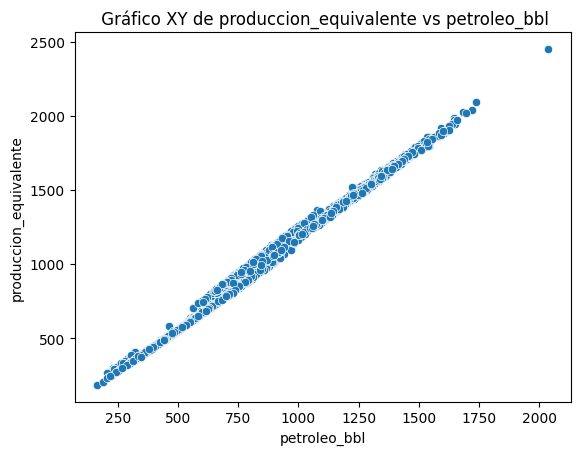

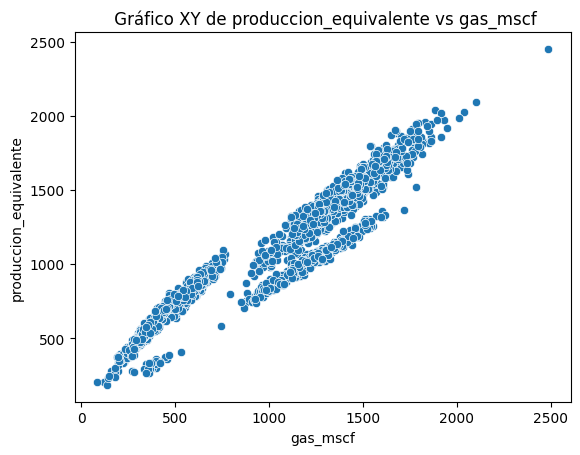

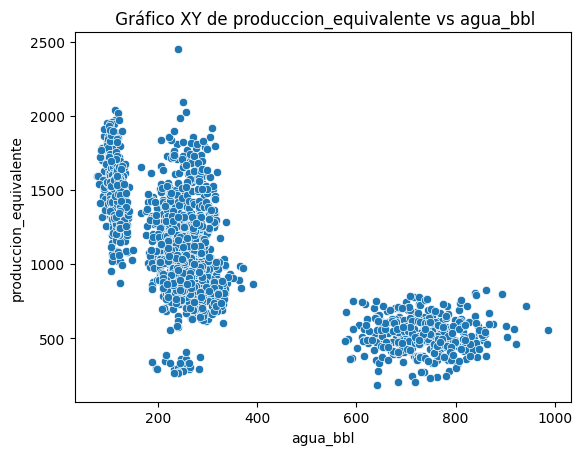

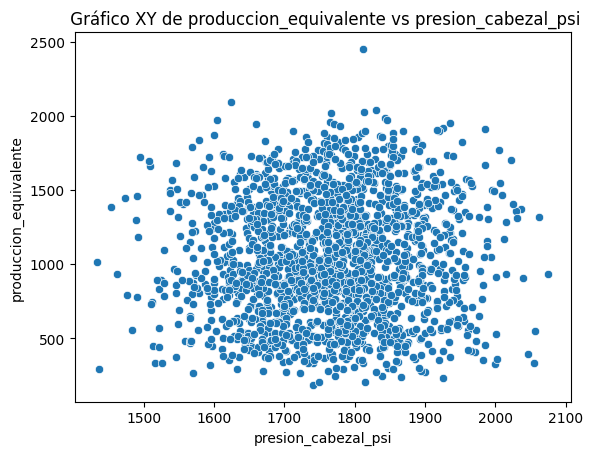

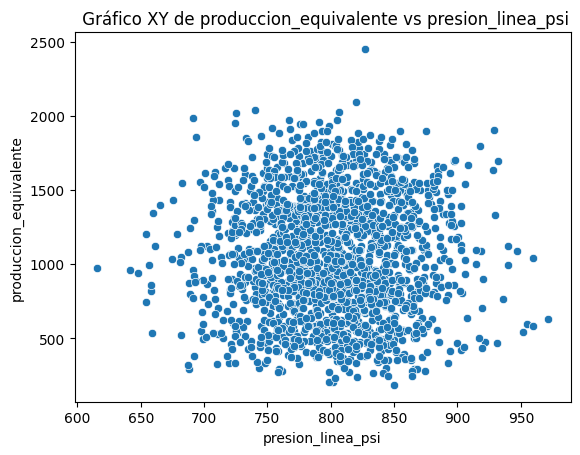

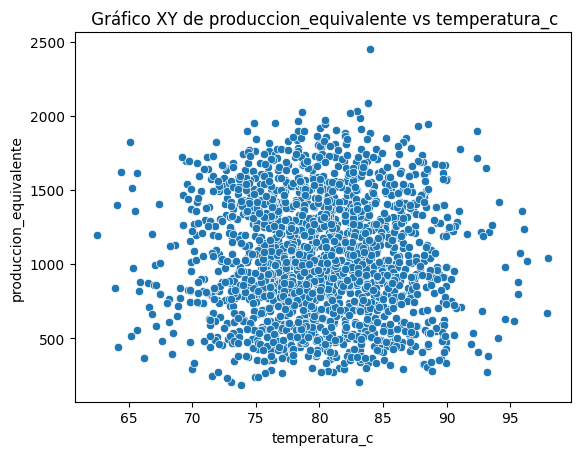

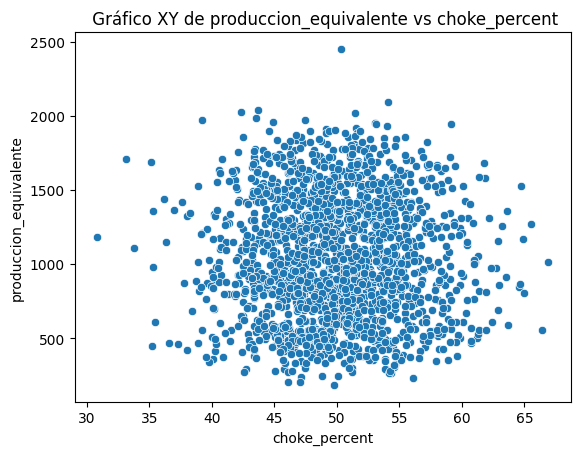

In [26]:
# Diagrama XY (Scatterplot)
# 
for f in features:
    sns.scatterplot(x = df[ f ] ,y=df[target])
    plt.title(f' Gráfico XY de produccion_equivalente vs {f}')
    plt.show()

<Axes: >

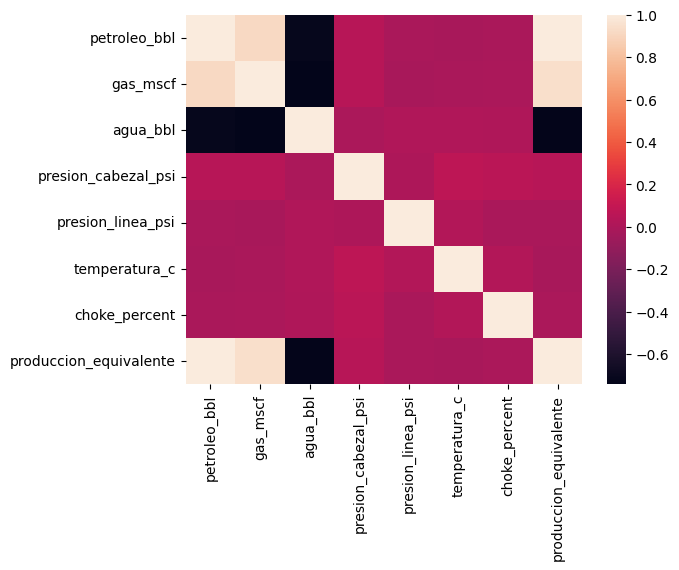

In [29]:

sns.heatmap(  subset.corr() )

<Axes: >

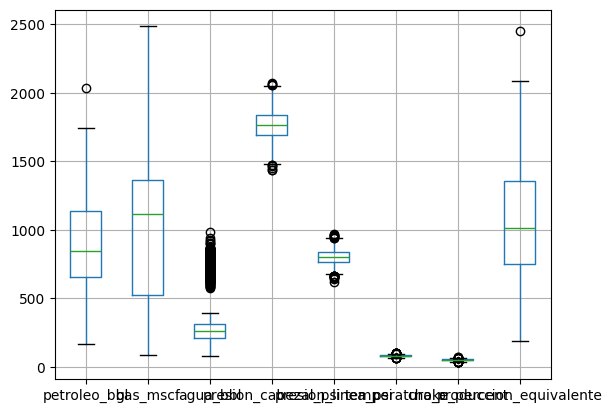

In [31]:
subset.boxplot()

In [33]:
# Librería de Normalización
from sklearn.preprocessing import StandardScaler

# Activación
scaler = StandardScaler()

X = scaler.fit_transform(df[features])

<Axes: >

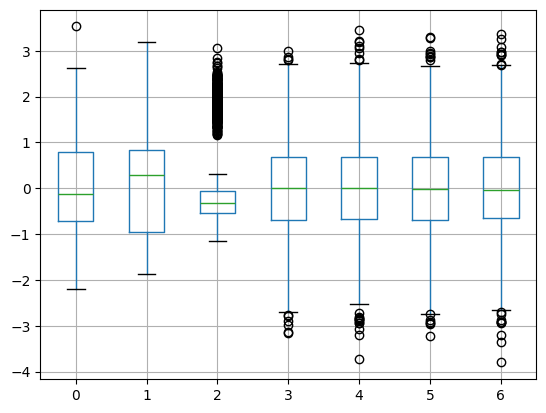

In [36]:
pd.DataFrame(X).boxplot()